In [7]:
%run ../setup_notebook.ipynb

/home/thijs/repos/dnp-code/rbm_pipeline_functions.py


/home/thijs/.conda/envs/py37/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Recording from /home/thijs/Desktop/zf_rbm_essentials/20180912_Run01_spontaneous_rbm2.h5
len test inds 1665


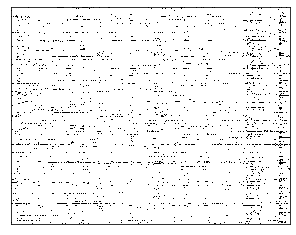

In [47]:
## spike raster
save_fig = True
plot_labels = False
freq = 1 / np.mean(np.diff(rec.time))

n_neurons = 500
random_neurons = np.random.choice(a=test_data['wb'].shape[0], size=n_neurons, replace=False)
raster_data = train_data['wb'][random_neurons, 1450:1900]
n_times = raster_data.shape[1]

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.imshow(raster_data, aspect='auto', cmap='Greys', origin='lower')

if plot_labels:
    ax.set_xticks([x * int(20 * freq) for x in range(4)])
    ax.set_xticklabels((np.round(ax.get_xticks() / freq)).astype('int'),
                              rotation=0)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Neurons')
else:
    ax.set_xticks([])
    ax.set_yticks([])
if save_fig:
    plt.savefig('/home/thijs/repos/zf-rbm/figures/figure_intro/spike_raster.svg', bbox_to_inches='tight')

[27760]


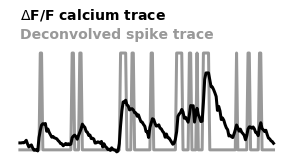

In [94]:
## convolution
save_fig = True
possible_neurons = np.where(full_data['wb'].sum(1) > 500)[0]
# len(possible_neurons)
i_neurons = np.random.choice(a=possible_neurons, size=3, replace=False)
i_neurons[0] = 34729
i_neurons[1] = 46213
i_neurons[2] = 27760

i_neurons = [27760]
print(i_neurons)
time_ex = slice(1450, 1650)
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ax = [ax]
for i_plot, i_n in enumerate(i_neurons):
    full_i_n = inds_wb[i_n]
    ax[i_plot].plot(rec.spikes[full_i_n, :][time_ex], c='k', alpha=0.4)
    ax[i_plot].plot(rec.df[full_i_n, :][time_ex], c='k')
    ax[i_plot].set_xticks([])
    ax[i_plot].set_yticks([])
    for ax_name in ['top', 'right', 'left', 'bottom']:
        ax[i_plot].spines[ax_name].set_visible(False)
    
ax[0].text(s='$\Delta$F/F calcium trace', x=0, y=1.35, 
           fontdict={'weight': 'bold', 'c':'k'})
ax[0].text(s='Deconvolved spike trace', x=0, y=1.15, 
           fontdict={'weight': 'bold', 'c':'k', 'alpha': 0.4})

if save_fig:
    plt.savefig('/home/thijs/repos/zf-rbm/figures/figure_intro/deconvolved_spikes.svg', bbox_to_inches='tight')

In [49]:
## HU activity

In [51]:
full_data['wb'].shape

(52518, 5553)